# Exo Planets Data Science

## Getting Data

In [3]:
import csv

rows = []

with open("main.csv", "r") as f:
  csv_reader = csv.reader(f)
  for row in csv_reader:
    rows.append(row)

headers = rows[0]
planet_data = rows[1:]

headers[0] = "row_num"

solar_system_planet_count = {}
for data in planet_data:
  if solar_system_planet_count.get(data[11]):
    solar_system_planet_count[data[11]] += 1
  else:
    solar_system_planet_count[data[11]] = 1

max_solar_system = max(solar_system_planet_count, key=solar_system_planet_count.get)

temp_planet_data_rows = list(planet_data)
for data in temp_planet_data_rows:
  planet_mass = data[3]
  if planet_mass.lower() == "unknown":
    planet_data.remove(data)
    continue
  else:
    planet_mass_value = planet_mass.split(" ")[0]
    planet_mass_ref = planet_mass.split(" ")[1]
    if planet_mass_ref == "Jupiters":
      planet_mass_value = float(planet_mass_value) * 317.8
    data[3] = planet_mass_value

  planet_radius = data[7]
  if planet_radius.lower() == "unknown":
    planet_data.remove(data)
    continue
  else:
    planet_radius_value = planet_radius.split(" ")[0]
    planet_radius_ref = planet_radius.split(" ")[2]
    if planet_radius_ref == "Jupiter":
      planet_radius_value = float(planet_radius_value) * 11.2
    data[7] = planet_radius_value

hd_10180_planets = []
for data in planet_data:
  if max_solar_system == data[11]:
    hd_10180_planets.append(data)

## Showing Data

In [4]:
import plotly.express as px

hd_10180_planet_masses = []
hd_10180_planet_names = []
for data in hd_10180_planets:
  hd_10180_planet_masses.append(data[3])
  hd_10180_planet_names.append(data[1])

hd_10180_planet_masses.append(1)
hd_10180_planet_names.append("Earth")

fig = px.bar(x=hd_10180_planet_names, y=hd_10180_planet_masses)
fig.show()

## Showing Graph for Planet Gravity

1. The Value of G (Gravitational Constant) is 6.674e-11

1. Mass of Earth = 5.972e+24

1. Radius of Earth = 6371000

In [5]:
import plotly.express as px

temp_planet_data_rows = list(planet_data)
for data in temp_planet_data_rows:
  if data[1].lower() == "hd 100546 b":
    planet_data.remove(data)

planet_masses = []
planet_radiuses = []
planet_names = []
for data in planet_data:
  planet_masses.append(data[3])
  planet_radiuses.append(data[7])
  planet_names.append(data[1])

planet_gravity = []
for index, name in enumerate(planet_names):
  gravity = (float(planet_masses[index])*5.972e+24) / (float(planet_radiuses[index])*float(planet_radiuses[index])*6371000*6371000) * 6.674e-11
  planet_gravity.append(gravity)

fig = px.scatter(x=planet_radiuses, y=planet_masses, size=planet_gravity, hover_data=[planet_names])
fig.show()

## Getting Low Gravity Planets with Gravity Less than 10

In [6]:
low_gravity_planets = []
for index, gravity in enumerate(planet_gravity):
    if gravity < 10:
        low_gravity_planets.append(planet_data[index])

print(len(low_gravity_planets))

1012


## Getting Low Gravity Planets with Gravity Less than 100

In [7]:
low_gravity_planets = []
for index, gravity in enumerate(planet_gravity):
    if gravity < 100:
        low_gravity_planets.append(planet_data[index])

print(len(low_gravity_planets))

3951


## Getting Planet Types

In [8]:
planet_type_values = []
for data in planet_data:
    planet_type_values.append(data[6])

print(list(set(planet_type_values)))

['Terrestrial', 'Neptune-like', 'Gas Giant', 'Super Earth']


1. Neptune-like: These planets are like neptune! They are big in size and have rings around them. They are also made of Ice. 

1. Super-Earth: These are the planets that have mass greater than earth but smaller than that of Neptune! (Neptune is 17 times Earth) 

1. Terrestrial: It is a planet that is composed primarily of silicate rocks or metals (Like Earth, Mars) 

1. Gas Giant: There are the planets that are composed of Gas (Hydrogen and Helium)

## Getting and Showing Planet Masses and Radiuses for the Low Gravity Planets

In [9]:
planet_masses = []
planet_radiuses = []

for data in low_gravity_planets:
    planet_masses.append(data[3])
    planet_radiuses.append(data[7])

fig = px.scatter(x=planet_radiuses, y=planet_masses)
fig.show()


## Elbow Method

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



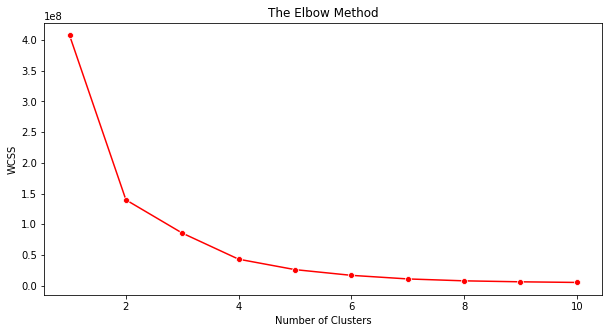

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn

x = []
for index, planet_mass in enumerate(planet_masses):
    templist = [planet_radiuses[index], planet_mass]
    x.append(templist)

wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init="k-means++", random_state=42)
    k_means.fit(x)

    wcss.append(k_means.inertia_)

plt.figure(figsize=(10, 5))
seaborn.lineplot(range(1, 11), wcss, marker="o", color="red")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## Showing Different Planet Types

In [11]:
planet_masses = []
planet_radiuses = []
planet_types = []
for data in low_gravity_planets:
    planet_masses.append(data[3])
    planet_radiuses.append(data[7])
    planet_types.append(data[6])

fig = px.scatter(x=planet_radiuses, y=planet_masses, color=planet_types)
fig.show()

## Getting Suitable Planets

In [12]:
suitable_planets = []
for data in low_gravity_planets:
  if data[6].lower() == "terrestrial" or data[6].lower() == "super earth":
    suitable_planets.append(data)

print(len(suitable_planets))

1452


## Showing Orbital Periods and Orbital Radiuses

In [13]:
temp_suitable_planets = list(suitable_planets) 
for data in temp_suitable_planets: 
    if data[8].lower() == "unknown":
        suitable_planets.remove(data)

for data in suitable_planets: 
    if data[9].split(" ")[1].lower() == "days": 
        data[9] = float(data[9].split(" ")[0]) #Days 
    else: 
        data[9] = float(data[9].split(" ")[0])*365 #Years 
    data[8] = float(data[8].split(" ")[0]) 

orbital_radiuses = [] 
orbital_periods = [] 
for data in suitable_planets: 
    orbital_radiuses.append(data[8]) 
    orbital_periods.append(data[9])

fig = px.scatter(x=orbital_radiuses, y=orbital_periods)
fig.show()

## Getting Perfect Planets

In [14]:
goldilock_planets = list(suitable_planets)
temp_goldilock_planets = list(suitable_planets)

for data in temp_goldilock_planets:
    if data[8] < 0.38 or data[8] > 2:
        goldilock_planets.remove(data)

print(f"Number of Suitable Planets: {len(suitable_planets)}")
print(f"Number of Perfect Planets: {len(goldilock_planets)}")

Number of Suitable Planets: 696
Number of Perfect Planets: 25


## Getting Planets with Pefect Speed

In [15]:
planet_speeds = []
for data in suitable_planets:
    distance = 2 * 3.14 * (data[8] * 1.496e+9)
    time = data[9] * 86400
    speed = distance/time
    planet_speeds.append(speed)

speed_supporting_planets = list(suitable_planets)
temp_speed_supporting_planets = list(suitable_planets)
for index, data in enumerate(temp_speed_supporting_planets):
    if planet_speeds[index] > 200:
        speed_supporting_planets.remove(data)
    
print(f"Number of Planets with Perfect Speed: {len(speed_supporting_planets)}")

Number of Planets with Perfect Speed: 8


## Getting Habitable Planets

In [16]:
habitable_planets = []
for data in speed_supporting_planets:
    if data in goldilock_planets:
        habitable_planets.append(data)

print(f"Number of Habitable Planets: {len(habitable_planets)}")

Number of Habitable Planets: 6


## Info about Terrestrial Planets in our Solar System

### Gravity of Terrestrial Planets in our Solar System:
1. Mercury: 3.7 m/s<sup>2</sup>
1. Venus: 8.87 m/s<sup>2</sup>
1. Earth: 9.807 m/s<sup>2</sup>
1. Mars: 3.721 m/s<sup>2</sup>

### Position of Terrestrial Planets in our Solar System:
1. Mercury: 0.4 AU from the Sun
1. Venus: 0.7 AU from the Sun
1. Earth: 1 AU from the Sun
1. Mars: 1.5 AU from the Sun

### Speed of Terrestrial Planets in our Solar System:
1. Mercury: 47 km/s
1. Venus: 35 km/s
1. Earth: 30 km/s
1. Mars: 24 km/s

### Temperature of Terrestrial Planets in our Solar System:
1. Mercury: 100-700 °C
1. Venus: 700 °C
1. Earth: -89.2-70.7 °C
1. Mars: 20-150 °C

## Creating a Dictionary of Perfect Planets based on specific requirements

In [17]:
final_dict = {}

for index, data in enumerate(planet_data):
    features_list = []
    gravity = (float(data[3])*5.972e+24) / (float(data[7])*float(data[7])*6371000*6371000) * 6.674e-11

    try:
        if gravity < 100:
            features_list.append("gravity")
    except:
        pass
    
    try:
        if data[6].lower() == "terrestrial" or data[6].lower() == "super earth":
            features_list.append("planet_type")
    except:
        pass
    
    try:
        if data[8] > 0.38 or data[8] < 2:
            features_list.append("goldilock")
    except:
        pass
    
    try:
        distance = 2 * 3.14 * (data[8] * 1.496e+9)
        time = data[9] * 86400
        speed = distance/time
        
        if speed < 200:
            features_list.append("speed")
    except:
        pass

    final_dict[index] = features_list

## Getting Amount of Planets with Perfect Gravity from Final Dictionary

In [18]:
gravity_planet_count = 0

for key, value in final_dict.items():
    if "gravity" in value:
        gravity_planet_count += 1

print(gravity_planet_count)

3951


## Getting Amount of Planets with Perfect Type from Final Dictionary

In [19]:
type_planet_count = 0

for key, value in final_dict.items():
    if "planet_type" in value:
        type_planet_count += 1

print(type_planet_count)

1485


## Getting Planets with No Gravity Support but Perfect Planet Type

In [20]:
no_gravity_supporting_planets_count = []
type_no_gravity_planet_count = 0

for data in planet_data:
    if data not in low_gravity_planets:
        no_gravity_supporting_planets_count.append(data)

for data in no_gravity_supporting_planets_count:
    if data[6].lower() == "terrestrial" or data[6].lower() == "super earth":
        type_no_gravity_planet_count += 1

print(f"Planets with No Gravity Support: {len(no_gravity_supporting_planets_count)}")
print(f"Planets with No Gravity Support but Perfect Planet Type: {type_no_gravity_planet_count}")

Planets with No Gravity Support: 299
Planets with No Gravity Support but Perfect Planet Type: 33


## Getting Glodilock Planets from Final Dictionary

In [21]:
goldilock_planet_count = 0

for key, value in final_dict.items():
    if "goldilock" in value:
        goldilock_planet_count += 1

print(f"Number of Goldilock Planets: {goldilock_planet_count}")

Number of Goldilock Planets: 696


## Getting Speed Supporting Planets from Final Dictionary

In [22]:
speed_planet_count = 0

for key, value in final_dict.items():
    if "speed" in value:
        speed_planet_count += 1

print(f"Number of Speed Supporting Planets: {speed_planet_count}")

Number of Speed Supporting Planets: 8


In [23]:
final_dict = {}

for index, data in enumerate(planet_data):
    features_list = []
    gravity = (float(data[3])*5.972e+24) / (float(data[7])*float(data[7])*6371000*6371000) * 6.674e-11

    try:
        if gravity < 100:
            features_list.append("gravity")
    except:
        pass
    
    try:
        if data[6].lower() == "terrestrial" or data[6].lower() == "super earth":
            features_list.append("planet_type")
    except:
        pass

    try:
        if float(data[8].split(" ")[0]) > 0.38 or float(data[8].split(" ")[0]) < 2:
            features_list.append("planet_type")
    except:
        pass    
    
    try:
        if data[8] > 0.38 or data[8] < 2:
            features_list.append("goldilock")
    except:
        pass
    
    try:
        try:
            distance = 2 * 3.14 * (float(data[8].split(" ")[0]) * 1.496e+9)
        except:
            try:
                distance = 2 * 3.14 * (data[8] * 1.496e+9)
            except:
                pass
        
        try: 
            time, unit = data[9].split(" ")[0], data[9].split(" ")[1] 

            if unit.lower() == "days": 
                time = float(time)
            else: 
                time = float(time) * 365 
        except: 
            time = planet_data[9] 
            time = time * 86400 
            speed = distance / time 
            
            if speed < 200: 
                features_list.append("speed") 
    except:
        pass

    final_dict[data[1]] = features_list


In [24]:
goldilock_planet_count = 0

for key, value in final_dict.items():
    if "goldilock" in value:
        goldilock_planet_count += 1

print(f"Number of Goldilock Planets: {goldilock_planet_count}")

Number of Goldilock Planets: 686


In [25]:
goldilock_gravity_type_count = 0

for key, value in final_dict.items():
    if "goldilock" in value and "planet_type" in value and "gravity" in value:
        goldilock_gravity_type_count += 1

print(goldilock_gravity_type_count)

686


In [26]:
speed_planet_count = 0

for key, value in final_dict.items():
    if "speed" in value:
        speed_planet_count += 1

print(speed_planet_count)

0


In [27]:
speed_goldilock_gravity_type_count = 0

for key, value in final_dict.items():
    if "goldilock" in value and "planet_type" in value and "gravity" in value and "speed" in value:
        speed_goldilock_gravity_type_count += 1

print(speed_goldilock_gravity_type_count)

0


In [32]:
final_planets = []

for data in planet_data:
    temp_dict = {
        "name": data[1], 
        "distance_from_earth": data[2], 
        "planet_mass": data[3],
        "planet_type": data[6],
        "planet_radius": data[7],
        "distance_from_sun": data[8],
        "orbital_period": data[9]
    }

    temp_dict["specification"] = final_dict[data[1]]
    final_planets.append(temp_dict)

print(final_planets)

[{'name': '11 Comae Berenices b', 'distance_from_earth': '305.0', 'planet_mass': 6165.32, 'planet_type': 'Gas Giant', 'planet_radius': 12.096, 'distance_from_sun': '1.29 AU', 'orbital_period': '326 days', 'specification': ['planet_type']}, {'name': '11 Ursae Minoris b', 'distance_from_earth': '410.0', 'planet_mass': 4684.372, 'planet_type': 'Gas Giant', 'planet_radius': 12.208, 'distance_from_sun': '1.53 AU', 'orbital_period': '1.4 years', 'specification': ['planet_type']}, {'name': '14 Andromedae b', 'distance_from_earth': '247.0', 'planet_mass': 1525.44, 'planet_type': 'Gas Giant', 'planet_radius': 12.879999999999999, 'distance_from_sun': '0.83 AU', 'orbital_period': '185.8 days', 'specification': ['gravity', 'planet_type']}, {'name': '14 Herculis b', 'distance_from_earth': '59.0', 'planet_mass': 1480.948, 'planet_type': 'Gas Giant', 'planet_radius': 12.879999999999999, 'distance_from_sun': '2.93 AU', 'orbital_period': '4.9 years', 'specification': ['gravity', 'planet_type']}, {'name